#### First we import all our packages:

In [30]:
#things we need in order to import our data
import datetime
import pandas as pd
#math-stuff
import numpy as np
import matplotlib.pyplot as plt
#This is for enabling us to interact with plots
#import mpld3
#mpld3.enable_notebook()
%matplotlib notebook

#### Then we need to download the data (EURUSD), which is in hdf5 format and convert to python. Here we also specify between which timepoints we collect data from:

In [15]:
hdf = pd.HDFStore(r'C:\Users\Karl\Downloads\20170101_20190101_EURUSD.h5', complib = 'zlib')
symbol = 'EURUSD'
start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('2018-01-02')

ticks = hdf.select(symbol, where='index>="{}" & index<="{}"'.format(start, end))
ticks.info()
hdf.close()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18777 entries, 2018-01-01 22:05:00.855000+00:00 to 2018-01-01 23:59:50.041000+00:00
Data columns (total 2 columns):
bid    18777 non-null float32
ask    18777 non-null float32
dtypes: float32(2)
memory usage: 293.4 KB


#### Now we want to check the data to see what the data looks like:

In [16]:
print(type(ticks))
ticks

<class 'pandas.core.frame.DataFrame'>


,bid,ask
date,,
2018-01-01 22:05:00.855000+00:00,1.20031,1.20113
2018-01-01 22:05:00.868000+00:00,1.20032,1.20112
2018-01-01 22:05:00.868000+00:00,1.20032,1.20112
2018-01-01 22:05:00.907000+00:00,1.20032,1.20112
2018-01-01 22:05:00.916000+00:00,1.20034,1.20110
...,...,...
2018-01-01 23:59:32.786000+00:00,1.20107,1.20110
2018-01-01 23:59:48.167000+00:00,1.20106,1.20110
2018-01-01 23:59:48.171000+00:00,1.20106,1.20109


## Method 1: k-means clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
# we import our values from our dataset
dataset = [ticks['bid'].values[0:len(ticks)], ticks['ask'].values[0:len(ticks)]]
dataset

[array([1.20031, 1.20032, 1.20032, ..., 1.20106, 1.20106, 1.20107],
       dtype=float32),
 array([1.20113, 1.20112, 1.20112, ..., 1.20109, 1.2011 , 1.2011 ],
       dtype=float32)]

In [19]:
print(len(ticks))
print(len(dataset[0]))

18777
18777


In [20]:
#quick test to see that we actually can extract data from our dataset
[dataset[0][0],dataset[1][0]]

[1.20031, 1.20113]

In [21]:
#we change format so that it is in a format that the algorithms are based on
data =[]
for i in range(0,len(dataset[0])):
    data.append([dataset[0][i],dataset[1][i]])

In [22]:
#we let our clustering model operate on our dataset
Kmean = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto').fit(data)
print(Kmean.labels_)
lb_kmean = Kmean.labels_

#centers = Kmean.cluster_centers_


[2 2 2 ... 0 0 0]


In [23]:
max(lb_kmean)

2

Text(0, 0.5, 'Price')

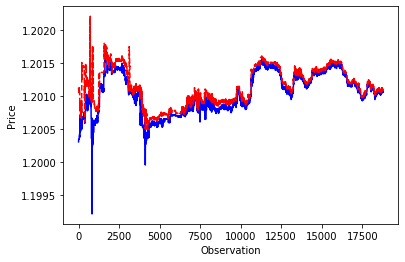

In [25]:
plt.clf()
l = len(dataset[0])
plt.plot(range(0,l),dataset[0],c='b')
plt.plot(range(0,l),dataset[1],c='r',ls='--')

plt.xlabel('Observation')
plt.ylabel('Price')

## Method 2: DBscan

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
clustering = DBSCAN(algorithm='auto', eps=0.00008, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=None, p=None).fit(data)
lb_DB = clustering.labels_
print(lb_DB)

[0 0 0 ... 0 0 0]


In [28]:
print(set(lb_DB))

{0, 1, 2, -1}


## Method 3: GMM (using expectation maximization technique)

In [33]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

print(np.mean(scaled_data), np.std(scaled_data))

-1.366458028726182e-13 1.0000000000000098


In [34]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
lb_gmm = gmm.fit_predict(scaled_data)
set(lb_gmm)


{0, 1, 2, 3}

## Plotting all the methods together:

<IPython.core.display.Javascript object>


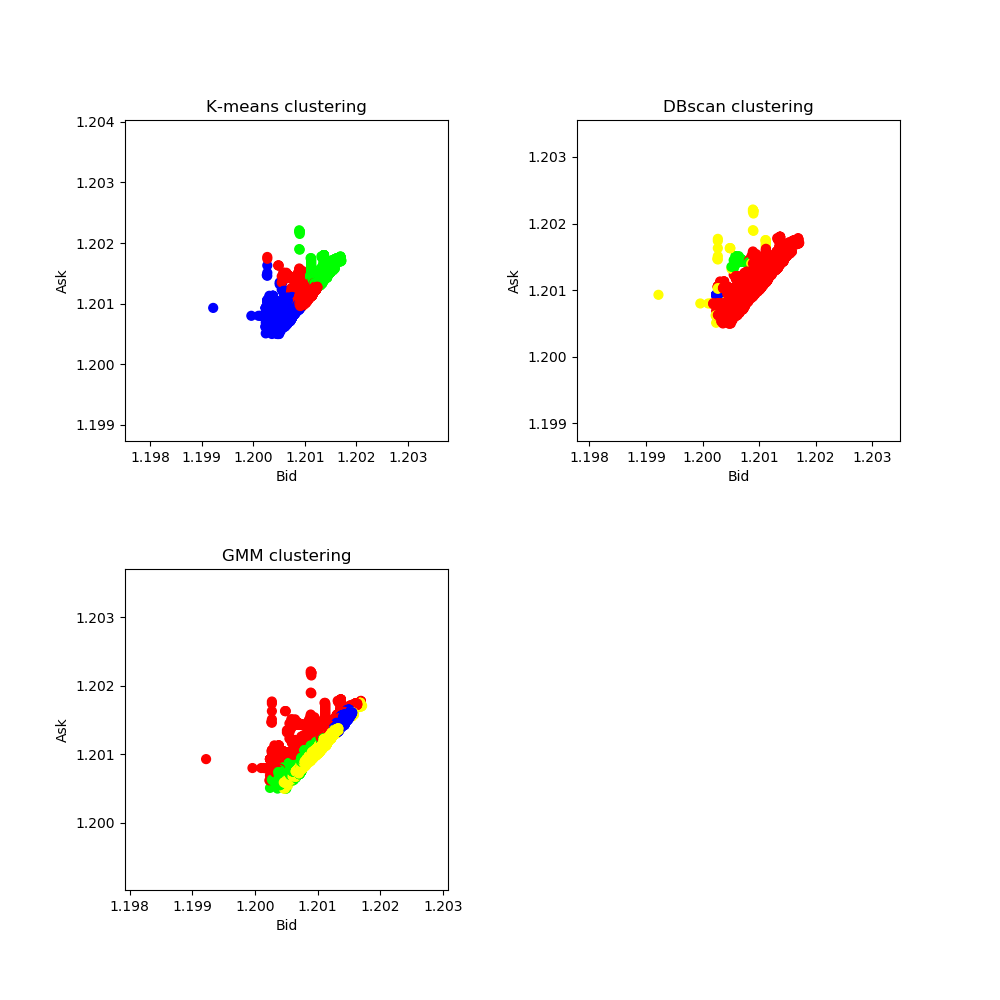

In [38]:
plt.figure(figsize=(10,10))
colormap = np.array(['red', 'lime', 'blue', 'yellow'])

plt.subplot(2,2,1)
plt.scatter(dataset[0],dataset[1],c=colormap[lb_kmean], s=40)
plt.title('K-means clustering')
plt.xlabel('Bid')
plt.ylabel('Ask')


plt.subplot(2,2,2)
plt.scatter(dataset[0],dataset[1],c=colormap[lb_DB], s=40)
plt.title('DBscan clustering')
plt.xlabel('Bid')
plt.ylabel('Ask')

plt.subplot(2,2,3)
plt.scatter(dataset[0],dataset[1],c=colormap[lb_gmm], s=40)
plt.title('GMM clustering')
plt.xlabel('Bid')
plt.ylabel('Ask')

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

In [ ]:
#plot for k-means clustering ver 1
plt.clf()
for i in range(0,len(dataset[0])):
    if lb[i] == 0:
        plt.scatter(dataset[0][i],dataset[1][i],c='r')
    elif lb[i] == 1:
        plt.scatter(dataset[0][i],dataset[1][i],c='b')
    elif lb[i] == 2:
        plt.scatter(dataset[0][i],dataset[1][i],c='g')

centers = Kmean.cluster_centers_
plt.scatter([centers[0][0], centers[1][0], centers[2][0]],[centers[0][1], centers[1][1], centers[2][1]], marker='+')

# plot for db_scan ver 1
plt.clf()
for i in range(0,len(dataset[0])):
    if lb_DB[i] == 0:
        plt.scatter(dataset[0][i],dataset[1][i],c='r')
    elif lb_DB[i] == 1:
        plt.scatter(dataset[0][i],dataset[1][i],c='b')
    elif lb_DB[i] == 2:
        plt.scatter(dataset[0][i],dataset[1][i],c='g')
    elif lb_DB[i] == -1:
        plt.scatter(dataset[0][i],dataset[1][i],c='y')
        
# plot for gmm ver 1
plt.clf()
for i in range(0,len(dataset[0])):
    if lb_gmm[i] == 0:
        plt.scatter(dataset[0][i],dataset[1][i],c='r')
    elif lb_gmm[i] == 1:
        plt.scatter(dataset[0][i],dataset[1][i],c='b')
    elif lb_gmm[i] == 2:
        plt.scatter(dataset[0][i],dataset[1][i],c='g')
    elif lb_gmm[i] == 3:
        plt.scatter(dataset[0][i],dataset[1][i],c='y')